In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu, threshold_multiotsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
import os
from tqdm import tqdm

/global/common/software/nersc/pm-2022q4/sw/pytorch/2.0.1/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pwd

/pscratch/sd/k/kpande/tomography/ornl_sem/unaligned/optimize_beta/ds_4


In [3]:
# label features based on otsu threshold
def label_image(image):
    # apply threshold
    thresh = threshold_otsu(image)
    bw = closing(image > thresh, square(3))
    
    # remove artifacts connected to image border
    cleared = clear_border(bw)
    
    # label image regions
    label_image = label(cleared)
    
    return label_image

In [28]:
def get_labelprops(rlxd):
    #rlxd: region properties of labled particles
    #output:  information about individual particle cross sections in the slice
    Area = []
    equivalent_diam = []
    Extent = []
    Euler_number = []
    Bbox_area = []
    Inertia_tn_eig = []
    BBox = []
    Centroid = []
    MJL=[]
    MNL=[]
    Eccentricity = []
    for i in tqdm(range(len(rlxd))):
        Area.append(rlxd[i].area)
        equivalent_diam.append(rlxd[i].equivalent_diameter)
        Extent.append(rlxd[i].extent)
        Euler_number.append(rlxd[i].euler_number)
        Bbox_area.append(rlxd[i].bbox_area)
        Inertia_tn_eig.append(rlxd[i].bbox)
        BBox.append(rlxd[i].inertia_tensor_eigvals)
        Centroid.append(rlxd[i].centroid)
        MJL.append(rlxd[i].major_axis_length)
        MNL.append(rlxd[i].minor_axis_length)
        Eccentricity.append(rlxd[i].eccentricity)
    output = {'area':Area,'equivalent_diam':equivalent_diam, 'extent' : Extent, 
    'euler_number' :Euler_number,'bbox_area' : Bbox_area,'inertia_tn_eig' : Inertia_tn_eig, 'bbox' : BBox,'centroid':Centroid,'MJ_Length':MJL,'MN_Length':MNL,'Eccentricity':Eccentricity}

    return output

In [29]:
for slic in range(28, 248, 4):
    th = threshold_multiotsu(data[4,:,:,slic]) #simple thresholding may be enough like threshold_otsu
    th = (th[0]+th[1])/2
    labelrec = data[4, :, :, slic]>th
    reglabelrec=regionprops(labelrec.astype('int'))
    rout = get_labelprops(reglabelrec)#
    print(rout['Eccentricity'])

100%|██████████| 1/1 [00:00<00:00, 1205.95it/s]


[0.97433886458911]


100%|██████████| 1/1 [00:00<00:00, 17.31it/s]


[0.978991128499806]


100%|██████████| 1/1 [00:00<00:00, 515.59it/s]


[0.9116472215073205]


100%|██████████| 1/1 [00:00<00:00, 236.70it/s]


[0.9135966888557476]


100%|██████████| 1/1 [00:00<00:00, 525.80it/s]


[0.7831739964156151]


100%|██████████| 1/1 [00:00<00:00, 389.91it/s]


[0.7459869306966169]


100%|██████████| 1/1 [00:00<00:00, 374.26it/s]


[0.762627971025614]


100%|██████████| 1/1 [00:00<00:00, 396.77it/s]


[0.9435984378419928]


100%|██████████| 1/1 [00:00<00:00, 553.12it/s]


[0.8326884233984095]


100%|██████████| 1/1 [00:00<00:00, 418.59it/s]


[0.8064612901653312]


100%|██████████| 1/1 [00:00<00:00, 388.79it/s]


[0.614389550198373]


100%|██████████| 1/1 [00:00<00:00, 417.22it/s]


[0.5507600578459962]


100%|██████████| 1/1 [00:00<00:00, 514.76it/s]


[0.7132849089076276]


100%|██████████| 1/1 [00:00<00:00, 358.46it/s]


[0.9113326503060724]


100%|██████████| 1/1 [00:00<00:00, 335.84it/s]


[0.8712444089153691]


100%|██████████| 1/1 [00:00<00:00, 366.03it/s]


[0.9349412895956191]


100%|██████████| 1/1 [00:00<00:00, 502.91it/s]


[0.9327073560690823]


100%|██████████| 1/1 [00:00<00:00, 405.56it/s]


[0.937848327239712]


100%|██████████| 1/1 [00:00<00:00, 406.70it/s]


[0.9489048992529632]


100%|██████████| 1/1 [00:00<00:00, 438.28it/s]


[0.9731483411127779]


100%|██████████| 1/1 [00:00<00:00, 538.77it/s]


[0.8874951863648275]


100%|██████████| 1/1 [00:00<00:00, 386.36it/s]


[0.9050731671796631]


100%|██████████| 1/1 [00:00<00:00, 398.36it/s]


[0.8190575489734284]


100%|██████████| 1/1 [00:00<00:00, 402.60it/s]


[0.845892288513859]


100%|██████████| 1/1 [00:00<00:00, 608.22it/s]


[0.7649504898485902]


100%|██████████| 1/1 [00:00<00:00, 446.96it/s]


[0.9146219426906398]


100%|██████████| 1/1 [00:00<00:00, 459.90it/s]


[0.9619760157896778]


100%|██████████| 1/1 [00:00<00:00, 373.72it/s]


[0.9083180953717006]


100%|██████████| 1/1 [00:00<00:00, 513.38it/s]


[0.9692857763966676]


100%|██████████| 1/1 [00:00<00:00, 371.70it/s]


[0.933081628220002]


100%|██████████| 1/1 [00:00<00:00, 356.33it/s]


[0.9417035214540063]


100%|██████████| 1/1 [00:00<00:00, 345.86it/s]


[0.9420632821398762]


100%|██████████| 1/1 [00:00<00:00, 533.22it/s]


[0.9631461867534431]


100%|██████████| 1/1 [00:00<00:00, 346.24it/s]


[0.8760505022116115]


100%|██████████| 1/1 [00:00<00:00, 372.66it/s]


[0.9537317931385825]


100%|██████████| 1/1 [00:00<00:00, 344.53it/s]


[0.8692015427242683]


100%|██████████| 1/1 [00:00<00:00, 486.75it/s]


[0.7612438270660018]


100%|██████████| 1/1 [00:00<00:00, 366.67it/s]


[0.953661303585281]


100%|██████████| 1/1 [00:00<00:00, 358.49it/s]


[0.8663447794710439]


100%|██████████| 1/1 [00:00<00:00, 542.88it/s]


[0.8479928233169619]


100%|██████████| 1/1 [00:00<00:00, 529.92it/s]


[0.8872048089804249]


100%|██████████| 1/1 [00:00<00:00, 565.73it/s]


[0.7695007924248664]


100%|██████████| 1/1 [00:00<00:00, 550.94it/s]


[0.9191569161002278]


100%|██████████| 1/1 [00:00<00:00, 576.46it/s]


[0.8832961278916178]


100%|██████████| 1/1 [00:00<00:00, 584.57it/s]


[0.9332020760967211]


100%|██████████| 1/1 [00:00<00:00, 557.23it/s]


[0.9500261209655492]


100%|██████████| 1/1 [00:00<00:00, 518.58it/s]


[0.9121961349428446]


100%|██████████| 1/1 [00:00<00:00, 480.61it/s]


[0.7557480437106616]


100%|██████████| 1/1 [00:00<00:00, 493.74it/s]


[0.27662181865490837]


100%|██████████| 1/1 [00:00<00:00, 473.02it/s]


[0.6545247334075209]


100%|██████████| 1/1 [00:00<00:00, 453.44it/s]


[0.675203203518553]


100%|██████████| 1/1 [00:00<00:00, 466.97it/s]


[0.7465199560801231]


100%|██████████| 1/1 [00:00<00:00, 482.99it/s]


[0.38570479195243285]


100%|██████████| 1/1 [00:00<00:00, 433.12it/s]


[0.8488536743735096]


100%|██████████| 1/1 [00:00<00:00, 204.06it/s]

[0.9041763908033197]


NameError: name 'z_slice' is not defined

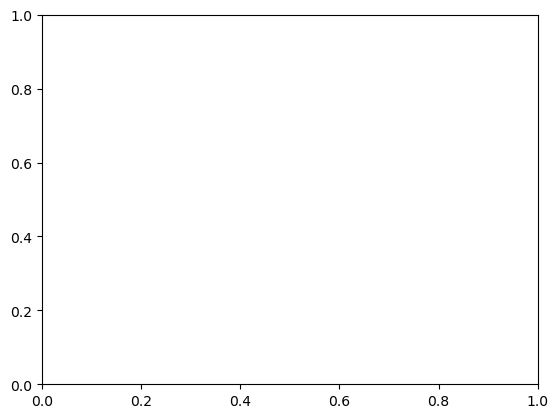

In [4]:
# get properties of the labeled features: major and minor axis
fig, ax = plt.subplots()
img = data[0,:,:,z_slice[-3]]
lab_img = label_image(img)
ax.imshow(img, cmap='gray')
for i, props in enumerate(regionprops(lab_img)):
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + np.cos(orientation) * 0.5 * props.axis_minor_length
    y1 = y0 - np.sin(orientation) * 0.5 * props.axis_minor_length
    x2 = x0 - np.sin(orientation) * 0.5 * props.axis_major_length
    y2 = y0 - np.cos(orientation) * 0.5 * props.axis_major_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=1.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=1.5)
    ax.plot(x0, y0, '.g', markersize=1)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=1.5)
    #print(i, props.axis_minor_length/props.axis_major_length)

In [46]:
average_circularity = np.zeros(15,)
for i_rec in range(15):
    circ = 0.0
    n_circles = 0
    for z in range(28, 248,4):
        lab_img = label_image(data[i_rec,:,:,z])
        #print(np.unique(lab_img))
        for props in regionprops(lab_img):
            if props.axis_major_length > 0:
                circ += props.axis_minor_length/props.axis_major_length
                n_circles += 1
    average_circularity[i_rec] = circ/n_circles
    print(i_rec, beta[i_rec], average_circularity[i_rec])


0 -2.5 0.5645979326904454
1 -2.142857142857143 0.5694683482760997
2 -1.7857142857142856 0.6015074500858189
3 -1.4285714285714286 0.6227268987573883
4 -1.0714285714285714 0.6363169051184213
5 -0.7142857142857142 0.6643059451164388
6 -0.3571428571428572 0.6768707620778925
7 0.0 0.6880640955670039
8 0.3571428571428572 0.6930897729449889
9 0.7142857142857144 0.6827885857084691
10 1.0714285714285716 0.6713063490734523
11 1.4285714285714288 0.6404241191302631
12 1.7857142857142856 0.6124827520120675
13 2.1428571428571432 0.5739301080984165
14 2.5 0.5569975126656226
